### 이미지 스크린샷
- youtube  페이지를 이미지로 스크린샷을 만들고
- 영상있는 부분의 위치를 파악
- 영상이 있는 부분을 pillow를 이용해서 자르기
- 영장을 저장해서 위에서 실습했던 google vision api 에 넣어서 결과를 확인
- 

In [7]:
from selenium import webdriver
from PIL import Image as pil
import time

In [5]:
url = 'https://youtube.com/watch?v=UThGcWBIMpU&t=500s'

In [11]:
driver = webdriver.Chrome()
driver.get(url)
time.sleep(1)
driver.save_screenshot('screenshot.png')

True

(902, 904)


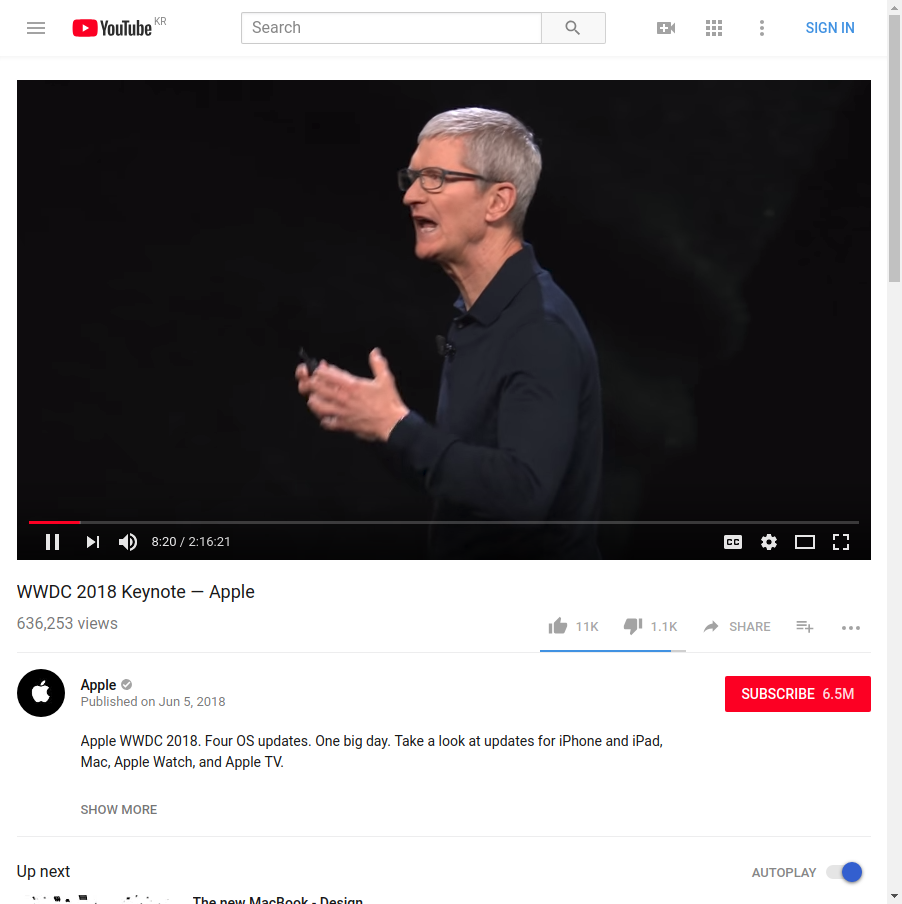

In [12]:
#이미지 확인
pil_im = pil.open('screenshot.png')
print(pil_im.size)
pil_im

In [13]:
#영상이 나오는 영역을 잘라보자
element = driver.find_element_by_css_selector('#player-container')
location= element.location
size = element.size
location,size

({'x': 2, 'y': 80}, {'height': 480, 'width': 854})

In [17]:
#top , button ,left , right 구하기
# 레티나 디스플레이 유저는 *2를 해줘야 한다.
left = location['x']
top = location['y']
bottom = top + size['height']
right = left + size['width']
area= (left,top,right,bottom)
area

(2, 80, 856, 560)

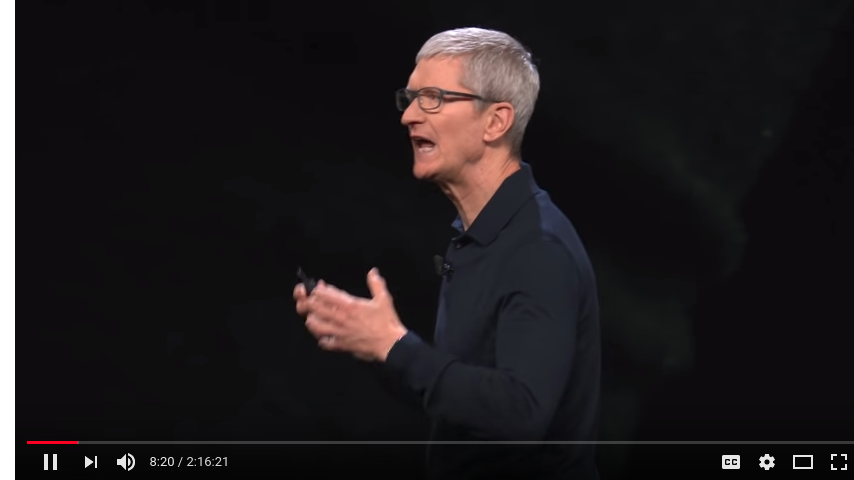

In [19]:
pil_im = pil.open('screenshot.png')
pil_im = pil_im.crop(area)
pil_im.save('screenshot_element.png')
pil_im

In [24]:
element = driver.find_element_by_css_selector('.ytp-chrome-bottom')
playbar_height = element.size['height']
playbar_height

39

In [25]:
#top , button ,left , right 구하기
# 레티나 디스플레이 유저는 *2를 해줘야 한다.
left = location['x']
top = location['y']
bottom = top + size['height']-playbar_height
right = left + size['width']
area= (left,top,right,bottom)
area

(2, 80, 856, 521)

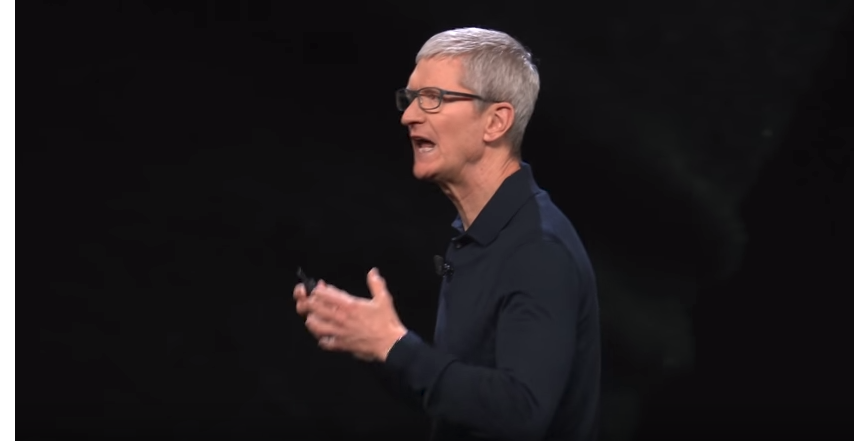

In [26]:
pil_im = pil.open('screenshot.png')
pil_im = pil_im.crop(area)
pil_im.save('screenshot_element_without_playbar.png')
pil_im

In [ ]:
#브라우져 화면 이미지로 스크린샷
driver = webdriver.Chrome()
driver.get(url)
for idx in range(3):
    time.sleep(1)
    driver.save_screenshot('screenshot' + str(idx) +''.png')

In [27]:
#썸네일로 만들기

In [28]:
pil_im.size

(854, 441)

In [31]:
pil_im.thumbnail((320,160))
pil_im.size
# 비율이 맞게끔 잘리는 것이기 때문에, thumbnail에서 지정한 대로 항상 잘리는건 아니다.

(310, 160)

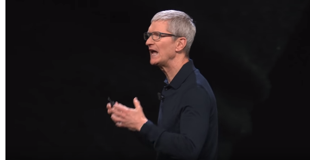

In [32]:
pil_im

### thumbnail
- ex) 2600px * 1800px (bout 7MB) -> facebook (origin file get)
- and make multiple thumbnail files th1,th2,..., make px different (reducing the memory)
- 용량인 큰 이미지를 그대로 받아드려서 로딩하면 큰 트래픽 비용이 발생하게 되고, 웹 사이트가 그 비용을 다 감당해야 하는데,
- 그 용량을 썸네일을 통해 줄여서 로딩하고 올리게 되면, 비용을 줄일 수 있게 된다.